de Cheveigné summaries:

i. Pitch can be defined many different ways, but most simply can be understood as a quality of auditory signals. Pitch can be ordered using a model relating it one-dimensionally to frequency response– a greater frequency equals a "higher" pitch, and vice versa. This model requires refinement if we pay attention to pitch perception of phenomena outside of simple pure tones.

ii. Place theory originated as a way to model the ear's perception of different pitches. The instrumental model that emerged out of this was the string, which was found to possess harmonics at simple integer ratios. Mersenne devised more relationship between properties of a string and its frequency response. Helmholtz was to improve on his theory in the 19th century, using the analogy of strings to describe the ear's processing of sound. He thought it occured like a miniature Fourier transform in the ear, with each separate decomposed sinusoid getting analyzed in a separate part of the ear and then reconstructed once in the brain. The problem with the theory from the beginning was that it required the fundamental to be present to perceive a pitch, and studies had already shown it was not necessary and could be masked or removed without a difference in perception.

iii. The contrasting time theory conjectured that in order to hear a pitch, the ear perceives its frequency by counting vibrations over time- instead of ratios of frequencies we have ratios of pulse counts. Rutherford was the first modern proponent of the theory, countering Helmholtz by proposing that the ear, like a telephone, simply sends messages to the brain. When this was objected to on the grounds that nerves could not fire as quickly as they should to be able to transmit high frequencies, Wever and Bray produced the volley theory to propose that several nerves firing in conjunction could together produce the high frequencies. One problem that appeared in these formulations was a greater phase-sensitivity than what was experimentally known to be the case.


# Assignment 2

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
file = 'avm.wav'
sig, sr = librosa.load(file,mono=True,sr=None)

In [3]:
sig_transform = librosa.stft(sig, n_fft=2048, hop_length=32, win_length=1024)

In [4]:
spec = librosa.amplitude_to_db(np.abs(sig_transform), ref=np.max)

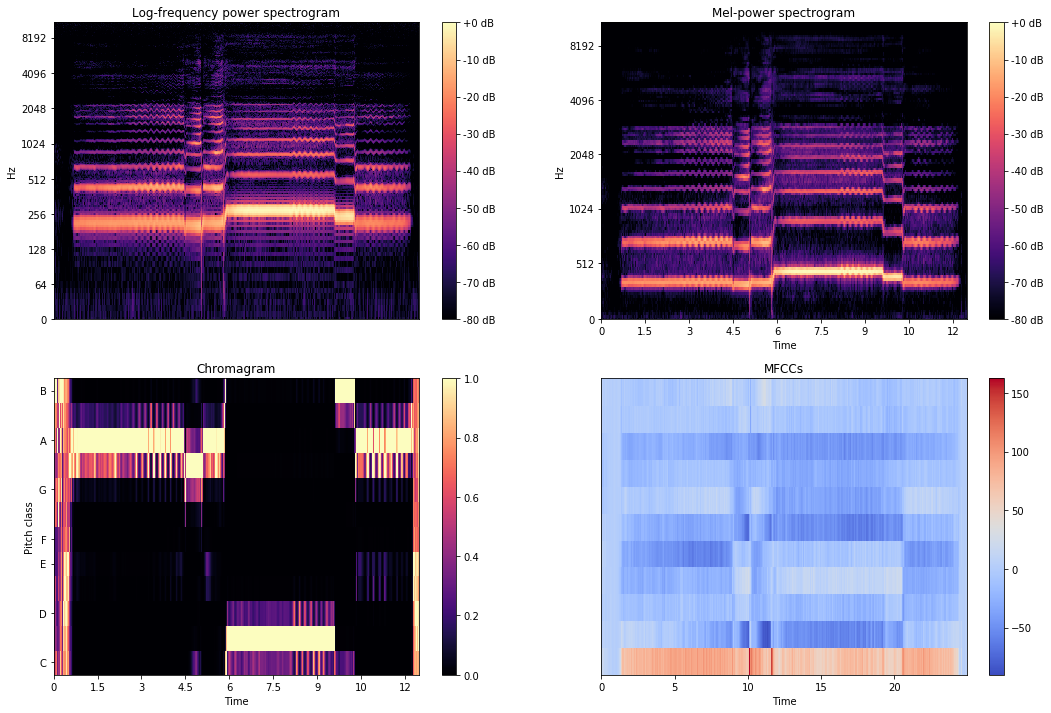

In [13]:
#Sorry, it make take a little while to load, just wated to make it format nicely!

plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
librosa.display.specshow(spec, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

plt.subplot(2,2,2)

S = librosa.feature.melspectrogram(y=sig, sr=sr, n_fft=2048, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-power spectrogram')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,2,3)

sig_harmonic, sig_percussive = librosa.effects.hpss(sig)

stftChroma = librosa.feature.chroma_stft(y=sig_harmonic,sr=sr, n_chroma=12)
librosa.display.specshow(stftChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')
plt.title('Chromagram')
plt.colorbar()

plt.subplot(2,2,4)

mfcc = librosa.feature.mfcc(y=sig, sr=sr, n_mfcc=13)
librosa.display.specshow(mfcc[1:12,:],x_axis='time')
plt.title('MFCCs')
plt.colorbar()

